<a href="https://colab.research.google.com/github/Mbaka11/20251R0136COSE47101/blob/main/fcnnmodi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt



# Load preprocessed data
df = pd.read_csv("cleaned_data.csv")

# Separate features and target
X = df.drop(columns=["prognosis"])
y = df["prognosis"]

print(f"Dataset shape: {X.shape}")
print(f"Target classes: {y.nunique()} → {y.unique()[:11]}")
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Assume X_train, X_test, y_train, y_test are already loaded as numpy arrays or pandas DataFrames

# Use LabelEncoder to convert string labels to integers
label_encoder = LabelEncoder()
# Fit on all unique labels to ensure all possible classes are covered
label_encoder.fit(y.unique())
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Convert data to PyTorch tensors
# Ensure data types are appropriate (e.g., float for features, long for labels)
# X remains float32
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# Convert encoded y to long
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long)

# Create TensorDatasets and DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define batch size
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the FCN model using PyTorch
class FCN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First hidden layer
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)   # Second hidden layer
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, num_classes) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Determine input size and number of classes
input_size = X_train_tensor.shape[1]
# Number of classes is the number of unique encoded labels
num_classes = len(label_encoder.classes_)


# Instantiate the model
model = FCN(input_size, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Dataset shape: (4981, 49)
Target classes: 11 → ['Heart Attack' 'Influenza' 'Dengue' 'Sinusitis' 'Eczema' 'Common Cold'
 'Heat Stroke' 'Migraine' 'Malaria' 'Arthritis' 'Stroke']

First few rows of the dataset:
        Age  Gender  Temperature (C)  Humidity  Wind Speed (km/h)  nausea  \
0  0.030303       1         0.729691  0.586755           0.264610       1   
1  0.545455       0         0.654889  0.364238           0.486594       0   
2  0.444444       0         0.515404  0.709272           0.136890       0   
3  0.050505       0         0.933323  0.380132           0.575202       1   
4  0.696970       0         0.593129  0.793377           0.572230       0   

   joint_pain  abdominal_pain  high_fever  chills  ...  sinus_headache  \
0           0               0           0       0  ...               0   
1           0               0           0       1  ...               0   
2           0               0           0       0  ...               0   
3           0               0   

Epoch 1/50, Loss: 0.0245
Epoch 1/50, Test Accuracy: 98.0943%
Epoch 2/50, Loss: 0.0255
Epoch 2/50, Test Accuracy: 98.1946%
Epoch 3/50, Loss: 0.0254
Epoch 3/50, Test Accuracy: 97.4925%
Epoch 4/50, Loss: 0.0259
Epoch 4/50, Test Accuracy: 98.1946%
Epoch 5/50, Loss: 0.0244
Epoch 5/50, Test Accuracy: 98.3952%
Epoch 6/50, Loss: 0.0258
Epoch 6/50, Test Accuracy: 98.2949%
Epoch 7/50, Loss: 0.0229
Epoch 7/50, Test Accuracy: 97.5928%
Epoch 8/50, Loss: 0.0248
Epoch 8/50, Test Accuracy: 96.7904%
Epoch 9/50, Loss: 0.0248
Epoch 9/50, Test Accuracy: 97.6931%
Epoch 10/50, Loss: 0.0260
Epoch 10/50, Test Accuracy: 97.7934%
Epoch 11/50, Loss: 0.0243
Epoch 11/50, Test Accuracy: 98.0943%
Epoch 12/50, Loss: 0.0236
Epoch 12/50, Test Accuracy: 98.1946%
Epoch 13/50, Loss: 0.0227
Epoch 13/50, Test Accuracy: 97.6931%
Epoch 14/50, Loss: 0.0241
Epoch 14/50, Test Accuracy: 97.4925%
Epoch 15/50, Loss: 0.0257
Epoch 15/50, Test Accuracy: 97.5928%
Epoch 16/50, Loss: 0.0247
Epoch 16/50, Test Accuracy: 97.7934%
Epoch 17/5

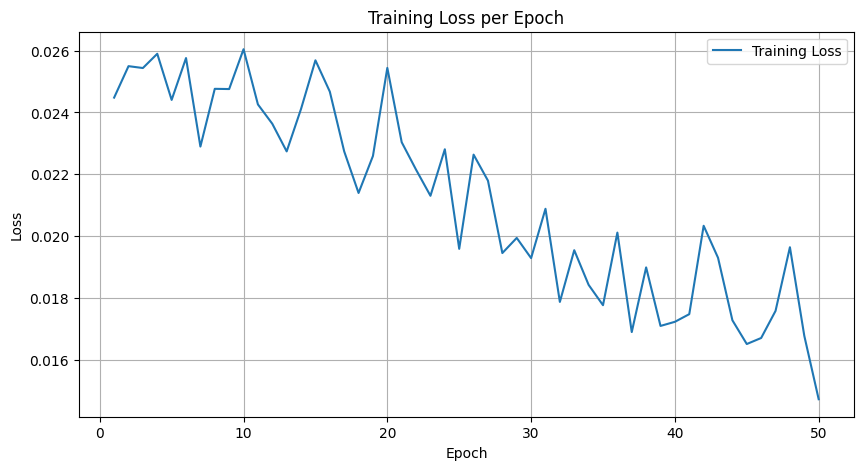

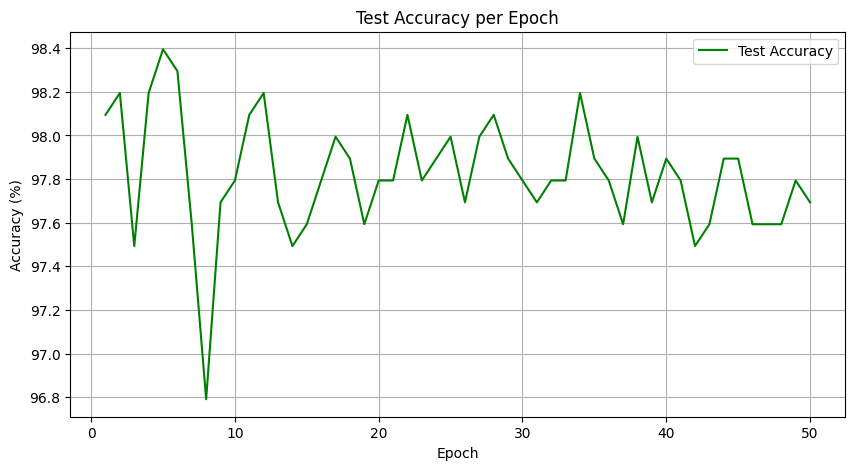

Final PyTorch FCN Test Accuracy: 97.6931%


In [7]:
# Training loop
num_epochs = 50

# Initialize lists to store loss and accuracy for plotting
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average training loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss) # Append training loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # Evaluate the model on the test data after each epoch
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): # Disable gradient calculation during evaluation
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate test accuracy for the epoch
    epoch_accuracy = 100 * correct / total
    test_accuracies.append(epoch_accuracy) # Append test accuracy for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Test Accuracy: {epoch_accuracy:.4f}%")


# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()


# Plot the test accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Print final test accuracy from the last epoch
print(f"Final PyTorch FCN Test Accuracy: {test_accuracies[-1]:.4f}%")

In [ ]:
!pip install torchviz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 754.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

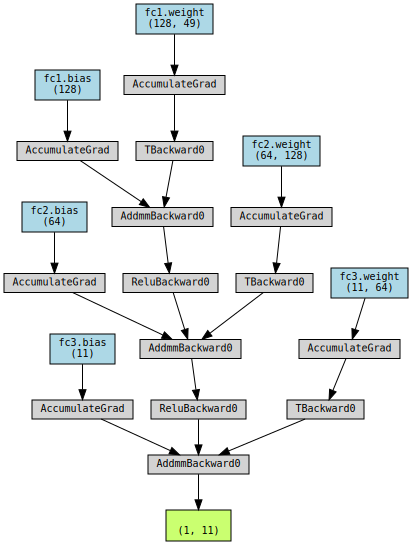

In [ ]:
from torchviz import make_dot

dummy_input = torch.randn(1, input_size) # Batch size of 1, input_size features

# Generate the computation graph
dot = make_dot(model(dummy_input), params=dict(model.named_parameters()))

# Display the graph (in Jupyter Notebook/Lab)
display(dot)